<a href="https://colab.research.google.com/github/my-quach/R-AI/blob/main/Vietnamese_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout

In [ ]:
# Tạo ImageDataGenerator, chuẩn hóa pixel về [0, 1]
datagen = ImageDataGenerator(rescale=1.0/255)

# Load ảnh từ thư mục theo batch
generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/food',       # đường dẫn đến thư mục chính
    target_size=(32, 32),    # resize ảnh về 32x32
    color_mode='rgb',        # 'grayscale' nếu ảnh trắng đen
    class_mode='categorical',# one-hot encoding cho nhãn
    batch_size=32,
    shuffle=True
)

# Load dữ liệu kiểm tra từ thư mục
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/food',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=10000,            # giả sử test dưới 10k ảnh
    shuffle=False
)

class_labels = ['banh mi', 'banh trang', 'bun dau', 'goi cuon', 'pho']
# Lấy 1 batch đầu tiên
X_batch, y_batch = next(generator)

# Flatten ảnh để dùng cho ANN
X_batch_flat = X_batch.reshape(X_batch.shape[0], -1)  # shape: (batch_size, 32*32*3)

print("Input shape for ANN:", X_batch_flat.shape)  # ví dụ: (32, 3072)
print("Label shape (one-hot):", y_batch.shape)      # ví dụ: (32, 2) nếu có 2 class

Found 50 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Input shape for ANN: (32, 3072)
Label shape (one-hot): (32, 5)


In [ ]:
#Load tập test
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/food',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=10000,  # Load tất cả test
    shuffle=False
)

# Lấy toàn bộ dữ liệu từ generator
x_train, y_train = next(generator)
x_test, y_test = next(test_generator)

# Flatten ảnh cho ANN
x_train = x_train.reshape(x_train.shape[0], -1)  # (50000, 32*32*3)
x_test = x_test.reshape(x_test.shape[0], -1)

# Không cần dùng to_categorical vì generator đã trả về one-hot
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Found 50 images belonging to 5 classes.
(18, 3072) (18, 5)
(50, 3072) (50, 5)


In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(32*32*3,)),
    Dense(128, activation='relu'),
    Dense(generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=500, batch_size=100, validation_data=(x_test, y_test))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.3245e-08 - val_accuracy: 0.5200 - val_loss: 2.4659
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 1.0000 - loss: 6.6227e-09 - val_accuracy: 0.5200 - val_loss: 2.4657
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 1.0000 - loss: 6.6227e-09 - val_accuracy: 0.5200 - val_loss: 2.4649
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 1.0000 - loss: 2.6491e-08 - val_accuracy: 0.5200 - val_loss: 2.4668
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 1.0000 - loss: 6.6227e-09 - val_accuracy: 0.5200 - val_loss: 2.4679
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 1.0000 - loss: 6.6227e-09 - val_accuracy: 0.5200 - val_loss: 2.4682
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 1.0000 - loss: 6.6227e-09 - val_accuracy: 0.5200 - val_loss: 2.4680
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 1.0000 - loss: 6.6227e-

In [8]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('test_acc:%.2f'%(test_acc*100))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5817 - loss: 4.3054
test_acc:56.00


In [ ]:
generator.class_indices

{'banh mi': 0, 'banh trang': 1, 'bun dau': 2, 'goi cuon': 3, 'pho': 4}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Dự đoán: goi cuon


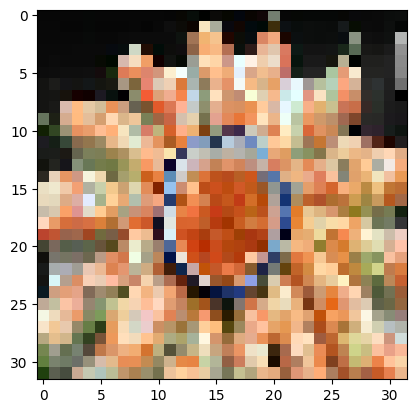

In [ ]:
img=load_img('/content/drive/MyDrive/food/goi cuon/goi cuon 2.jpg', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)


# Tiền xử lý ảnh
img = img_to_array(img)
img_flatten = img.reshape(1, 32*32*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize

# Dự đoán
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))

# Lấy nhãn class
class_labels = list(generator.class_indices.keys())

# In kết quả
print("Dự đoán:", class_labels[predicted_class_index])

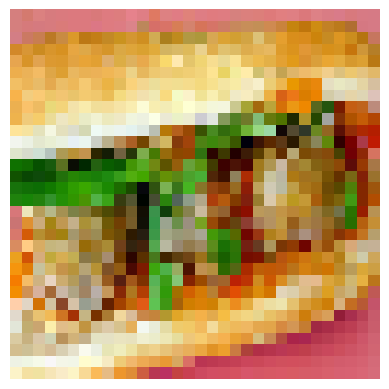

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Dự đoán: banh mi


In [ ]:
# Load ảnh và hiển thị
img = load_img('/content/drive/MyDrive/food/banh mi/banh mi 7.jpg', target_size=(32, 32))
plt.imshow(img)
plt.axis('off')
plt.show()

# Tiền xử lý ảnh
img = img_to_array(img)
img_flatten = img.reshape(1, 32*32*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize

# Dự đoán
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))

# Lấy nhãn class
class_labels = list(generator.class_indices.keys())

# In kết quả
print("Dự đoán:", class_labels[predicted_class_index])

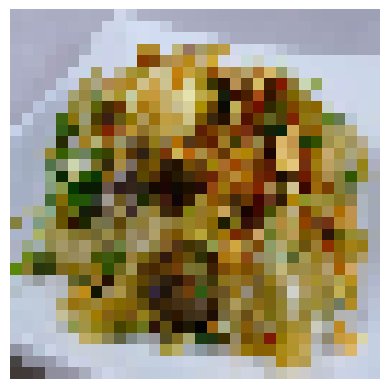

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Dự đoán: banh trang


In [ ]:
# Load ảnh và hiển thị
img = load_img('/content/drive/MyDrive/food/banh trang/banh trang 6.jpg', target_size=(32, 32))
plt.imshow(img)
plt.axis('off')
plt.show()

# Tiền xử lý ảnh
img = img_to_array(img)
img_flatten = img.reshape(1, 32*32*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize

# Dự đoán
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))

# Lấy nhãn class
class_labels = list(generator.class_indices.keys())

# In kết quả
print("Dự đoán:", class_labels[predicted_class_index])

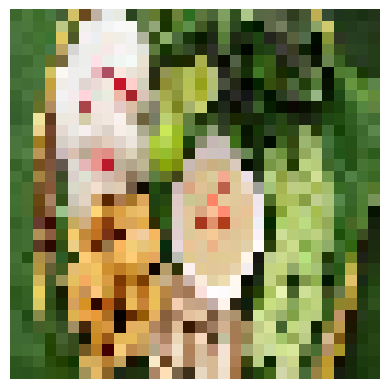

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Dự đoán: bun dau


In [ ]:
# Load ảnh và hiển thị
img = load_img('/content/drive/MyDrive/food/bun dau/bun dau 4.jpg', target_size=(32, 32))
plt.imshow(img)
plt.axis('off')
plt.show()

# Tiền xử lý ảnh
img = img_to_array(img)
img_flatten = img.reshape(1, 32*32*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize

# Dự đoán
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))

# Lấy nhãn class
class_labels = list(generator.class_indices.keys())

# In kết quả
print("Dự đoán:", class_labels[predicted_class_index])

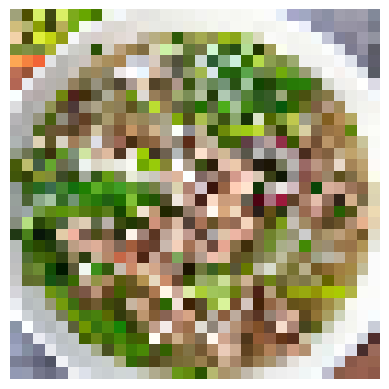

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Dự đoán: pho


In [ ]:
# Load ảnh và hiển thị
img = load_img('/content/drive/MyDrive/food/pho/pho 3.jpg', target_size=(32, 32))
plt.imshow(img)
plt.axis('off')
plt.show()

# Tiền xử lý ảnh
img = img_to_array(img)
img_flatten = img.reshape(1, 32*32*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize

# Dự đoán
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))

# Lấy nhãn class
class_labels = list(generator.class_indices.keys())

# In kết quả
print("Dự đoán:", class_labels[predicted_class_index])

In [11]:
model.save('trainAI.h5')